In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [5]:
# Параметры
IMG_SIZE = 200
BATCH_SIZE = 32
EPOCHS = 20
DATA_PATH = 'D:/Soft/kagglecatsanddogs_3367a/lab3/var5'  # Путь к папке с данными
SAVE_MODEL_PATH = 'imagenet_classifier.h5'
NUM_CLASSES = 10

In [6]:
# Шаг 1: Загрузка данных
# Используем ImageDataGenerator для подготовки данных
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    DATA_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    DATA_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 10219 images belonging to 10 classes.
Found 2554 images belonging to 10 classes.


In [7]:
# Шаг 2: Создание модели на основе VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Замораживаем слои базы
for layer in base_model.layers:
    layer.trainable = False

# Добавляем собственные слои классификации
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [8]:
# Шаг 3: Обучение модели
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/20
320/320 [==============================] - 72s 214ms/step - loss: 1.2538 - accuracy: 0.5842 - val_loss: 0.7563 - val_accuracy: 0.7596
Epoch 2/20
320/320 [==============================] - 66s 205ms/step - loss: 0.8846 - accuracy: 0.6965 - val_loss: 0.6227 - val_accuracy: 0.7815
Epoch 3/20
320/320 [==============================] - 63s 198ms/step - loss: 0.8007 - accuracy: 0.7204 - val_loss: 0.6327 - val_accuracy: 0.7831
Epoch 4/20
320/320 [==============================] - 62s 193ms/step - loss: 0.7264 - accuracy: 0.7505 - val_loss: 0.5849 - val_accuracy: 0.8007
Epoch 5/20
320/320 [==============================] - 54s 170ms/step - loss: 0.7007 - accuracy: 0.7552 - val_loss: 0.5728 - val_accuracy: 0.8081
Epoch 6/20
320/320 [==============================] - 55s 170ms/step - loss: 0.6743 - accuracy: 0.7648 - val_loss: 0.5460 - val_accuracy: 0.8218
Epoch 7/20
320/320 [==============================] - 56s 175ms/step - loss: 0.6226 - accuracy: 0.7837 - val_loss: 0.5702 - val_ac

In [9]:
# Шаг 4: Оценка точности
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

80/80 [==============================] - 11s 136ms/step - loss: 0.5371 - accuracy: 0.8254
Validation Accuracy: 82.54%


In [10]:
# Шаг 5: Сохранение модели
model.save(SAVE_MODEL_PATH)
print(f"Model saved to {SAVE_MODEL_PATH}")

Model saved to imagenet_classifier.h5


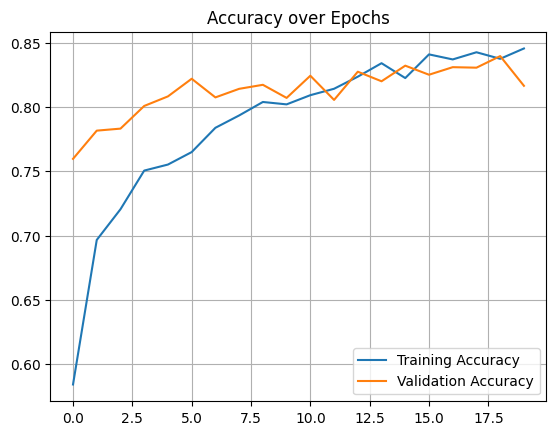

In [16]:
# Шаг 6: Построение графиков точности и функции потерь

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.title('Loss over Epochs')
plt.grid(True)
plt.show()

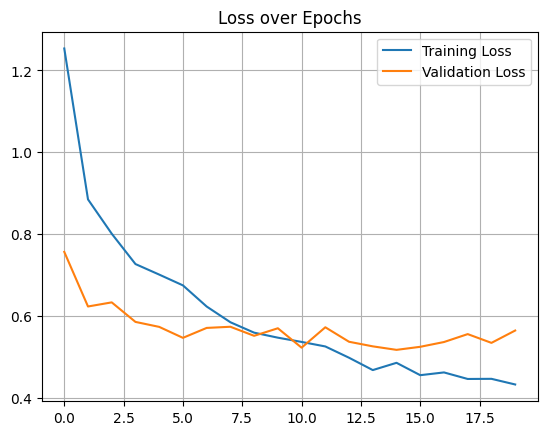

<Figure size 640x480 with 0 Axes>

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.grid(True)
plt.show()

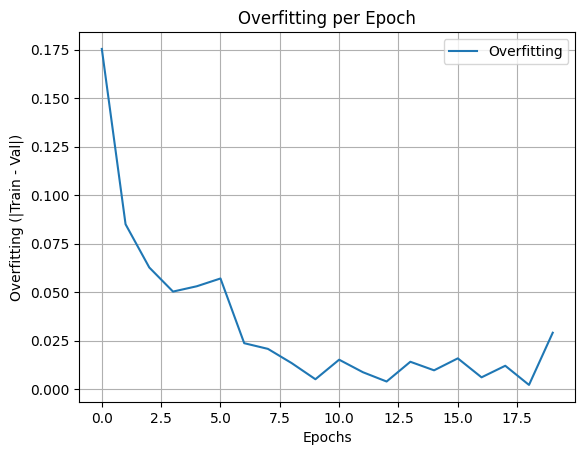

In [13]:
plt.plot([abs(t - v) for t, v in zip(history.history['accuracy'], history.history['val_accuracy'])], label="Overfitting")
plt.title('Overfitting per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Overfitting (|Train - Val|)')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
# Шаг 7: Тестирование на новых данных (опционально)
def predict_on_new_data(model, data_path, img_size):
    test_datagen = ImageDataGenerator(rescale=1.0/255)
    test_generator = test_datagen.flow_from_directory(
        data_path,
        target_size=(img_size, img_size),
        batch_size=1,
        class_mode=None,
        shuffle=False
    )
    predictions = model.predict(test_generator)
    return predictions

# Вызываем predict_on_new_data при наличии новых данных
# predictions = predict_on_new_data(model, '/path/to/new/data', IMG_SIZE)